In [1]:
import os, glob, cv2, math
import numpy as np
import matplotlib.pyplot as plt

def imshow_plt(img, show_type='color'):
    plt.figure(figsize=(10,10))
    if show_type=='gray':
        plt.imshow(img, 'gray')
    else:
        plt.imshow(img)
    plt.show()
    
def distance(x1, y1, x2, y2):
    result = math.sqrt( math.pow(x1 - x2, 2) + math.pow(y1 - y2, 2))
    return result

In [6]:
def img_crop(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray,180,255, cv2.THRESH_BINARY_INV)
#     imshow_plt(thresh, 'gray')
    
    k=np.ones((5,5), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, k)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((15,15), np.uint8))
#     imshow_plt(thresh, 'gray')
    
    contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     image = cv2.drawContours(img, contours, -1, (255,0,0), 5)
#     imshow_plt(image)
    
#     print('center : ', int(img.shape[1]/2), int(img.shape[0]/2))
    for ii, cnt in enumerate(contours):
        M = cv2.moments(cnt)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
#         print(cx, cy)
#         print(int(img.shape[1]/2), int(img.shape[0]/2), cx, cy)
        d=distance(int(img.shape[1]/2), int(img.shape[0]/2), cx, cy)
        if ii==0:
            min_dist = (ii, d, cnt, (cx, cy))
        else:
#             print(cv2.contourArea(cnt))
            if d<min_dist[1] and 3000<cv2.contourArea(cnt)<1000000:
                min_dist=(ii, d, cnt, (cx, cy))
#                 image = cv2.drawContours(img, min_dist[2], -1, (255,0,0), 5)
#                 imshow_plt(image)
#     print(min_dist)
    crop_sizex = 700
    crop_sizey = 700
    cx, cy = min_dist[3][0], min_dist[3][1]
    img_crop = img[cy-crop_sizey if cy-crop_sizey>0 else 0:cy+crop_sizey,cx-crop_sizex if cx-crop_sizex>0 else 0:cx+crop_sizex]
#     imshow_plt(img_crop)
    
    return img_crop

In [7]:
PATH = './01_data/'
label_folder = os.listdir(PATH)
label_li = [float(l.split('_')[-1]) for l in label_folder]
label_folder.sort()
print('*'*30)
print('Load data')
print('*'*30)

imgs=list()
imgs_gray=list()
for label_path in label_folder:
    img_path_tmp = glob.glob(PATH+label_path+'/*')
    for path in img_path_tmp:
#         print(path)
#         imgs.append(cv2.imread(path)) 
        label = label_path.split('_')[-1]
        name = path.split('\\')[-1]
#         print(name+'_'+label)
        img = cv2.imread(path)
        crop_img=img_crop(img)
#         imshow_plt(crop_img)
        if not os.path.isdir('./03_preprocess/crop/'+label_path):
            os.makedirs('./03_preprocess/crop/'+label_path)
        cv2.imwrite('./03_preprocess/crop/'+label_path+'/'+name, crop_img)
#         imgs_gray.append(cv2.imread(path,0))


******************************
Load data
******************************


In [8]:
def img_crop_manual(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray,180,255, cv2.THRESH_BINARY_INV)
#     imshow_plt(thresh, 'gray')
    
    k=np.ones((5,5), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, k)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((15,15), np.uint8))
#     imshow_plt(thresh, 'gray')
    
    contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     image = cv2.drawContours(img, contours, -1, (255,0,0), 5)
#     imshow_plt(image)
    
    print('center : ', int(img.shape[1]/2), int(img.shape[0]/2))
    for ii, cnt in enumerate(contours):
        M = cv2.moments(cnt)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
#         print(cx, cy)
#         print(int(img.shape[1]/2), int(img.shape[0]/2), cx, cy)
        d=distance(int(img.shape[1]/2), int(img.shape[0]/2), cx, cy)
        if ii==0:
            min_dist = (ii, d, cnt, (cx, cy))
        else:
#             print(cv2.contourArea(cnt))
            if d<min_dist[1] and 1000<cv2.contourArea(cnt)<1000000:
                min_dist=(ii, d, cnt, (cx, cy))
#                 image = cv2.drawContours(img, min_dist[2], -1, (255,0,0), 5)
#                 imshow_plt(image)
#     print(min_dist)
    crop_sizex = 700
    crop_sizey = 700
    cx, cy = min_dist[3][0], min_dist[3][1]
    img_crop = img[cy-crop_sizey:cy+crop_sizey,cx-crop_sizex:cx+crop_sizex]
#     imshow_plt(img_crop)
    
    return img_crop

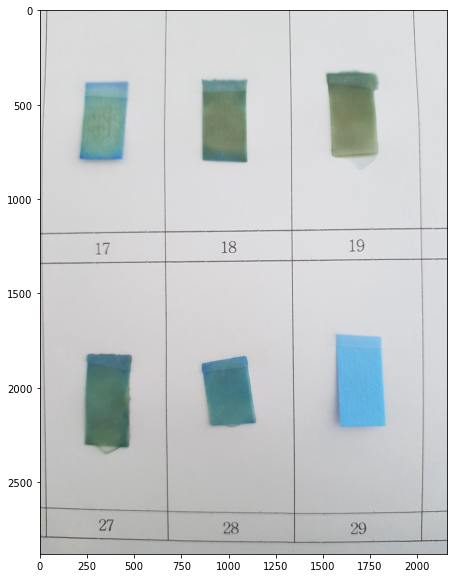

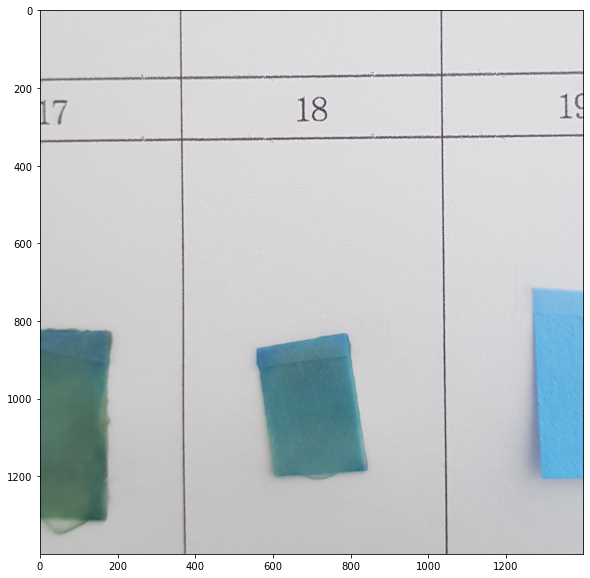

True

In [223]:
n='20210723_153134'

name = './01_data/Date_pH_8.02/{}.jpg'.format(n)
img = cv2.imread(name)
imshow_plt(img)
# crop_img=img_crop_manual(img)
# imshow_plt(crop_img)


# cv2.imwrite('../03_preprocess/crop/Date_ppm_150/20210826_113308.jpg', crop_img)
crop_sizex = 700
crop_sizey = 700
cx, cy = 1000,1700
img_crop = img[cy-crop_sizey if cy-crop_sizey>0 else 0:cy+crop_sizey, cx-crop_sizex if cx-crop_sizex>0 else 0:cx+crop_sizex]
imshow_plt(img_crop)
cv2.imwrite('./03_preprocess/crop/Date_pH_8.02/{}.jpg'.format(n), img_crop)

In [198]:
img_path_tmp

['./01_data/Date_pH_9.22\\20210722_182512.jpg',
 './01_data/Date_pH_9.22\\20210722_182514.jpg',
 './01_data/Date_pH_9.22\\20210722_182515(0).jpg',
 './01_data/Date_pH_9.22\\20210722_182515.jpg',
 './01_data/Date_pH_9.22\\20210722_182516.jpg',
 './01_data/Date_pH_9.22\\20210722_182549.jpg',
 './01_data/Date_pH_9.22\\20210722_182709.jpg',
 './01_data/Date_pH_9.22\\20210722_182711.jpg',
 './01_data/Date_pH_9.22\\20210722_182713.jpg',
 './01_data/Date_pH_9.22\\20210722_182714.jpg',
 './01_data/Date_pH_9.22\\20210722_182715.jpg',
 './01_data/Date_pH_9.22\\20210722_182808.jpg',
 './01_data/Date_pH_9.22\\20210722_182809.jpg',
 './01_data/Date_pH_9.22\\20210722_182810.jpg',
 './01_data/Date_pH_9.22\\20210722_182824.jpg',
 './01_data/Date_pH_9.22\\20210722_182825.jpg',
 './01_data/Date_pH_9.22\\20210722_182839.jpg',
 './01_data/Date_pH_9.22\\20210722_182840.jpg',
 './01_data/Date_pH_9.22\\20210722_182841.jpg',
 './01_data/Date_pH_9.22\\20210722_182843.jpg',
 './01_data/Date_pH_9.22\\20210722_18

In [196]:
PATH = './03_preprocess/crop/'
label_folder = os.listdir(PATH)
label_li = [float(l.split('_')[-1]) for l in label_folder if not '.' in l]
label_folder.sort()
print('*'*30)
print('Load data')
print('*'*30)

imgs=list()
imgs_gray=list()
for label_path in label_folder:
    print(label_path)
    if not '.' in label_path:
        img_path_tmp = glob.glob(PATH+label_path+'/*')
    #     images=list()
        images=[cv2.imread(path) for path in img_path_tmp]

        plt.figure(figsize=(10,10))
        for i in range(20):
            img = images[i].astype('uint8')
#             img_mean = (img*1.0 / img.mean(axis=(0,1)))
            plt.subplot(4,5,i+1),plt.imshow(img)
    #         plt.title(titles[i])
            plt.xticks([]),plt.yticks([])

        plt.show()

******************************
Load data
******************************
Date_pH_1.13
Date_pH_10.2
Date_pH_11.43
Date_pH_2.38
Date_pH_3.05
Date_pH_4.01
Date_pH_5.07
Date_pH_6.02
Date_pH_7.00
Date_pH_8.02
Date_pH_9.22
